In [ ]:
# import module
import numpy as np
from numpy import pi
import pandas as pd

# To create plots
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
import seaborn as sns

# To create interactive plots
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# To get new datatypes and functions
from collections import Counter
from cycler import cycler

# To investigate distributions
from scipy.stats import norm, skew, probplot
from scipy.optimize import curve_fit


# To measure time
from time import time

# To build models
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as error_metric
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# To gbm light
from lightgbm import LGBMClassifier

In [1]:
train = pd.read_csv('kaggle/train.csv')
test  = pd.read_csv('kaggle/test.csv')

NameError: name 'pd' is not defined

In [ ]:
train.head(10)

In [ ]:
test.head(10)

In [5]:
# Data preprocessing
print('Number of duplicates in train : ',sum(train.duplicated()))
print('Number of duplicates in test : ', sum(test.duplicated()))
print('Total number of missing values in train : ', train.isna().values.sum())
print('Total number of missing values in train : ', test.isna().values.sum())



NameError: name 'train' is not defined

In [7]:
# Check Imbalance and Histogram
# plt.figure(figsize=(10,8))
# plt.title('Histogram of Activity')
# sns.countplot(train.Activity)
# plt.xticks(rotation=90)

# Create plot
colormap = get_cmap('rainbow')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(train['Activity'].value_counts().shape[0]-1))]

# print(train['Activity'].value_counts().index)
# print(train['Activity'].value_counts())

data = go.Bar(x = train['Activity'].value_counts().index,
              y = train['Activity'].value_counts(),
              marker = dict(color = colors))

layout = go.Layout(title = 'Smartphone Activity Label Distribution',
                   xaxis = dict(title = 'Activity'),
                   yaxis = dict(title = 'Count'))

fig = go.Figure(data=[data], layout=layout)
iplot(fig)

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



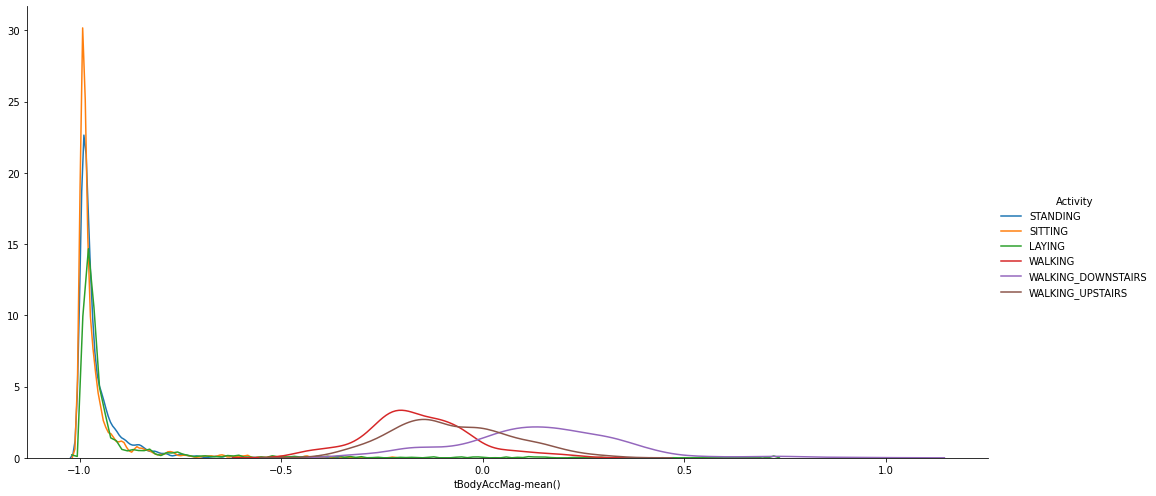

In [8]:
# 여러개의 그래프 그리기, Activity에 따라 x축을 'tBodyAccMag-mean()' 로 하는 distplot 생성

facetgrid = sns.FacetGrid(train, hue='Activity',size=7, aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMag-mean()', hist=False).add_legend()
plt.show()

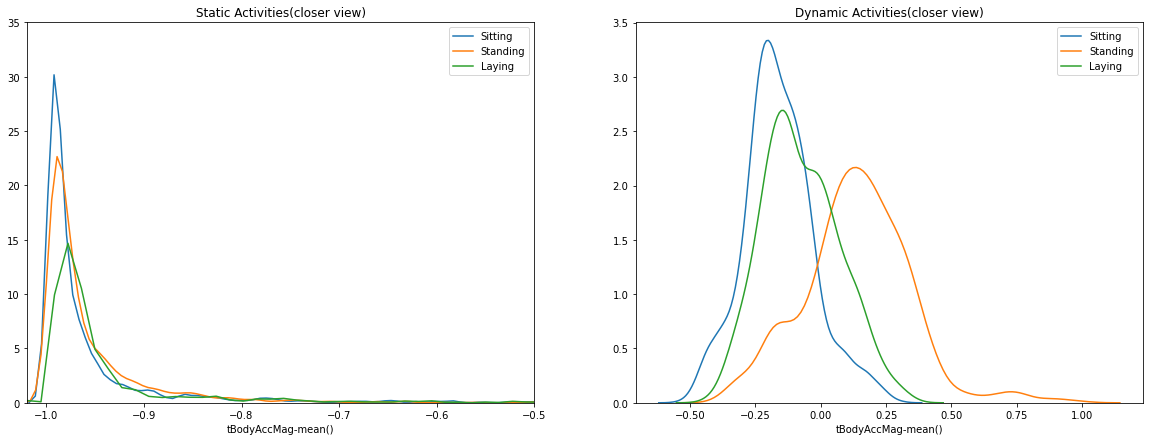

In [9]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.title("Static Activities(closer view)")
sns.distplot(train[train["Activity"]=="SITTING"]['tBodyAccMag-mean()'],hist = False, label = 'Sitting')
sns.distplot(train[train["Activity"]=="STANDING"]['tBodyAccMag-mean()'],hist = False,label = 'Standing')
sns.distplot(train[train["Activity"]=="LAYING"]['tBodyAccMag-mean()'],hist = False, label = 'Laying')
plt.axis([-1.02, -0.5, 0, 35])
plt.subplot(1,2,2)
plt.title("Dynamic Activities(closer view)")
sns.distplot(train[train["Activity"]=="WALKING"]['tBodyAccMag-mean()'],hist = False, label = 'WALKING')
sns.distplot(train[train["Activity"]=="WALKING_DOWNSTAIRS"]['tBodyAccMag-mean()'],hist = False,label = 'WALKING_DOWNSTAIRS')
sns.distplot(train[train["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMag-mean()'],hist = False, label = 'WALKING_UPSTAIRS')
plt.show()

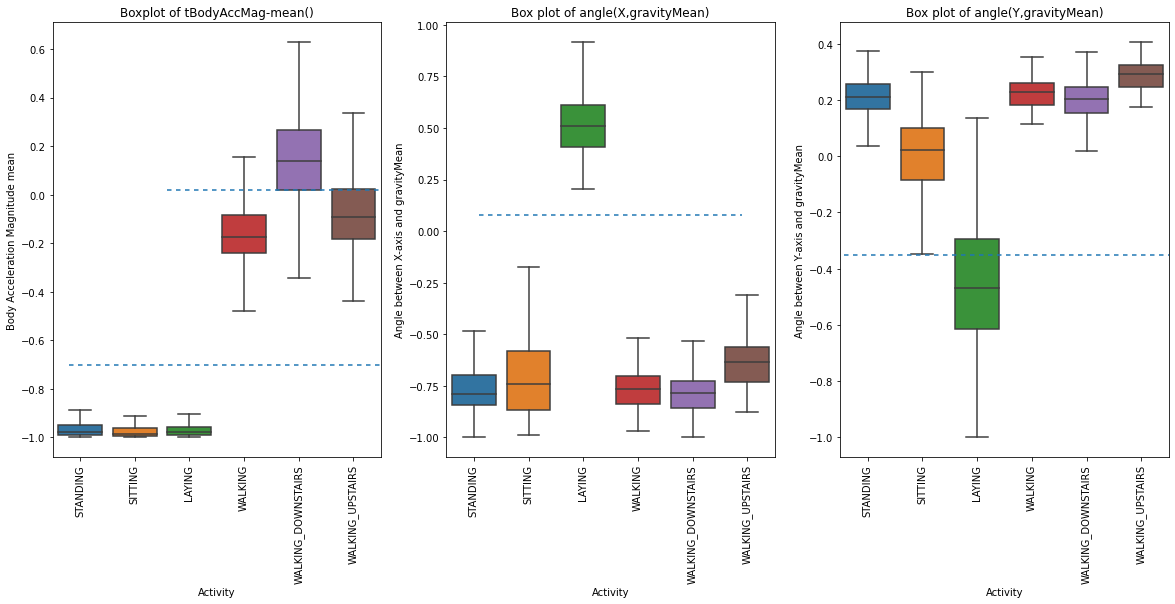

In [10]:
# Box plot using sns
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.boxplot(x='Activity', y='tBodyAccMag-mean()',data=train, showfliers=False)
plt.ylabel('Body Acceleration Magnitude mean')
plt.title("Boxplot of tBodyAccMag-mean()")
plt.axhline(y=-0.7, xmin=0.05,dashes=(3,3))
plt.axhline(y=0.020, xmin=0.35, dashes=(3,3))
plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=train, showfliers=False)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,dashes=(3,3))
plt.ylabel("Angle between X-axis and gravityMean")
plt.title('Box plot of angle(X,gravityMean)')
plt.xticks(rotation = 90)
plt.subplot(1,3,3)
sns.boxplot(x='Activity', y='angle(Y,gravityMean)', data = train, showfliers=False)
plt.ylabel("Angle between Y-axis and gravityMean")
plt.title('Box plot of angle(Y,gravityMean)')
plt.xticks(rotation = 90)
plt.axhline(y=-0.35, xmin=0.01, dashes=(3,3))
plt.show()

In [11]:
# 시각화 t-sne. 시간 단축을 위해 90퍼 이상을 설명할 수 있게 PCA로 차원축소 후 t-sne 시각화
X_for_tsne = train.drop(['subject', 'Activity'], axis=1)
scale_data=StandardScaler().fit_transform(X_for_tsne)

pca = PCA(n_components=0.9, random_state=7)
pca_and_scaled_data = pca.fit_transform(scale_data)

tsne_model = TSNE(random_state = 7, n_components=2, verbose=1, perplexity=50, n_iter=1000)
tsne=tsne_model.fit_transform(pca_and_scaled_data)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.065s...
[t-SNE] Computed neighbors for 7352 samples in 14.186s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 3.873299
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.098053
[t-SNE] KL divergence after 1000 iterations: 1.437829


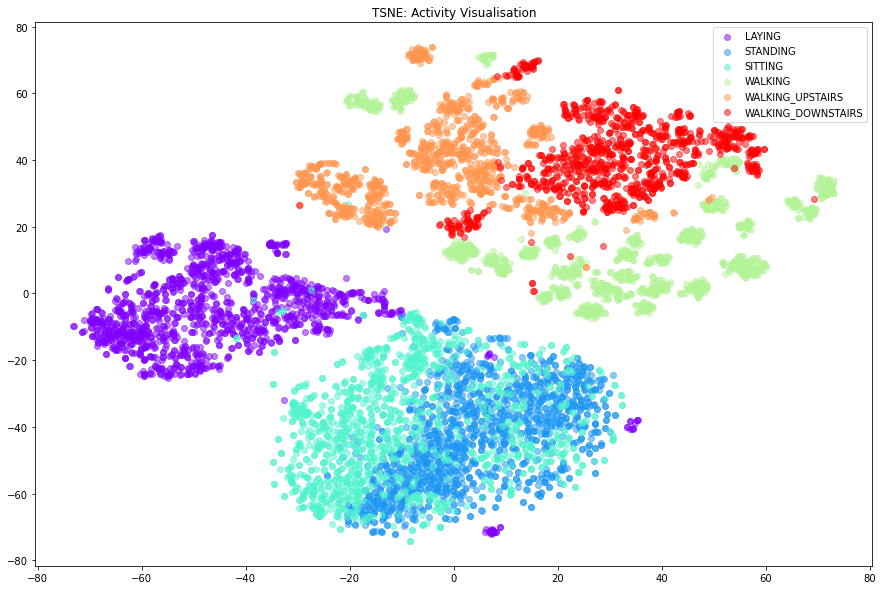

In [12]:
# Create subplots
fig, ax = plt.subplots(1, 1, figsize=(15,10))

### Plot Activities
# Create t-sne plot
colormap = get_cmap('rainbow')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(train['Activity'].value_counts().shape[0]-1))]

# print(train['Activity'].value_counts().index)
# print(train['Activity'].value_counts())

# Plot each activity
for i, group in enumerate(train['Activity'].value_counts().index):
    # Mask to separate sets
    mask = (train['Activity']==group).values
    # print(mask)
    # print(len(mask))
    ax.scatter(x=tsne[mask][:,0], y=tsne[mask][:,1], c=colors[i], alpha=0.5, label=group)

ax.set_title('TSNE: Activity Visualisation')
ax.legend()

# ### Plot Subjects
# # Create t-sne plot
# colormap = get_cmap('rainbow')
# colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(train['subject'].unique().shape[0]-1))]

# # Plot each participant
# for i, group in enumerate(train['subject'].unique()):
#     # Mask to separate sets
#     mask = (train['subject']==group).values
#     ax[1].scatter(x=tsne[mask][:,0], y=tsne[mask][:,1], c=colors[i], alpha=0.5, label=group)

# ax[1].set_title('TSNE: Participant Visualisation')
plt.show()

In [13]:
X_train = train.drop(['subject', 'Activity'], axis=1)
y_train = train.Activity
X_test = test.drop(['subject', 'Activity'], axis=1)
y_test = test.Activity
print('Training data size : ', X_train.shape)
print('Test data size : ', X_test.shape)
print('Train result data size : ', y_train.shape)
print('Test result data size : ', y_test.shape)

Training data size :  (7352, 561)
Test data size :  (2947, 561)
Train result data size :  (7352,)
Test result data size :  (2947,)


In [14]:
# ML Model using Logistic Regression
parameters = {'C':np.arange(10,61,10), 'penalty':['l2','l1']}
lr_classifier = LogisticRegression()
lr_classifier_rs = RandomizedSearchCV(lr_classifier, param_distributions=parameters, cv=5, random_state = 7)
lr_classifier_rs.fit(X_train, y_train)
y_pred = lr_classifier_rs.predict(X_test)

lr_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Logistic Regression : ", lr_accuracy)

Accuracy using Logistic Regression :  0.9619952494061758


In [15]:
# function to plot confusion matrix
def plot_confusion_matrix(cm,lables):
    fig, ax = plt.subplots(figsize=(12,8)) # for plotting confusion matrix as image
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=lables, yticklabels=lables,
    ylabel='True label',
    xlabel='Predicted label')
    plt.xticks(rotation = 90)
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]), ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

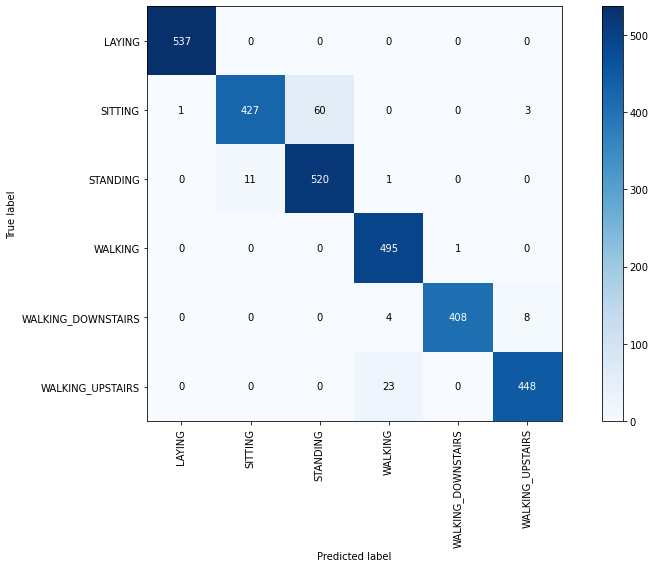

In [16]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))  # plotting confusion matrix

In [17]:
#function to get best random search attributes
def get_best_randomsearch_results(model):
    print("Best estimator : ", model.best_estimator_)
    print("Best set of parameters : ", model.best_params_)
    print("Best score : ", model.best_score_)

# getting best random search attributes
get_best_randomsearch_results(lr_classifier_rs)

Best estimator :  LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
Best set of parameters :  {'penalty': 'l2', 'C': 10}
Best score :  0.941240478781284


In [18]:
parameters = {'C':np.arange(1,12,2)}
lr_svm = LinearSVC(tol=0.00005)
lr_svm_rs = RandomizedSearchCV(lr_svm, param_distributions=parameters, cv=5, random_state = 7)
lr_svm_rs.fit(X_train, y_train)
y_pred = lr_svm_rs.predict(X_test)

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning:

The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning:

In [19]:
lr_svm_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using linear SVM : ", lr_svm_accuracy)

Accuracy using linear SVM :  0.9667458432304038


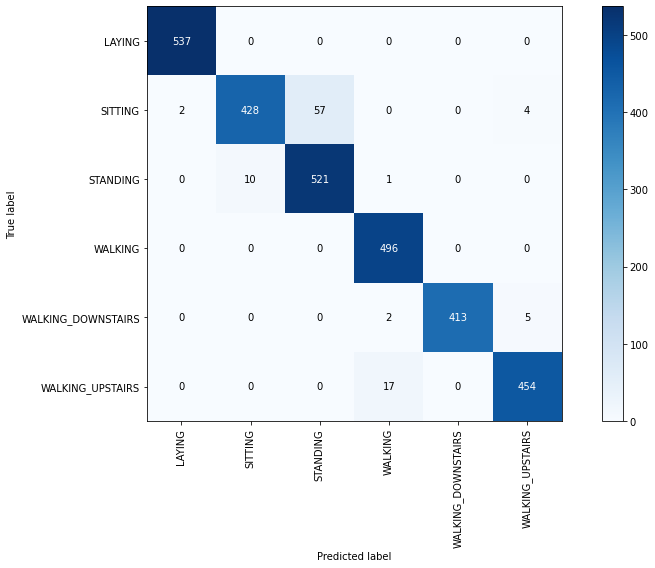

In [20]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred)) # plotting confusion matrix

In [21]:
# getting best random search attributes
get_best_randomsearch_results(lr_svm_rs)

Best estimator :  LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
     verbose=0)
Best set of parameters :  {'C': 1}
Best score :  0.9413764961915125


In [22]:
parameters = {'C':[2,4,8,16],'gamma': [0.125, 0.250, 0.5, 1]}
kernel_svm = SVC(kernel='rbf')
kernel_svm_rs = RandomizedSearchCV(kernel_svm,param_distributions=parameters, cv=5, random_state = 7)
kernel_svm_rs.fit(X_train, y_train)
y_pred = kernel_svm_rs.predict(X_test)

In [23]:
kernel_svm_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Kernel SVM : ", kernel_svm_accuracy)

Accuracy using Kernel SVM :  0.9423142178486597


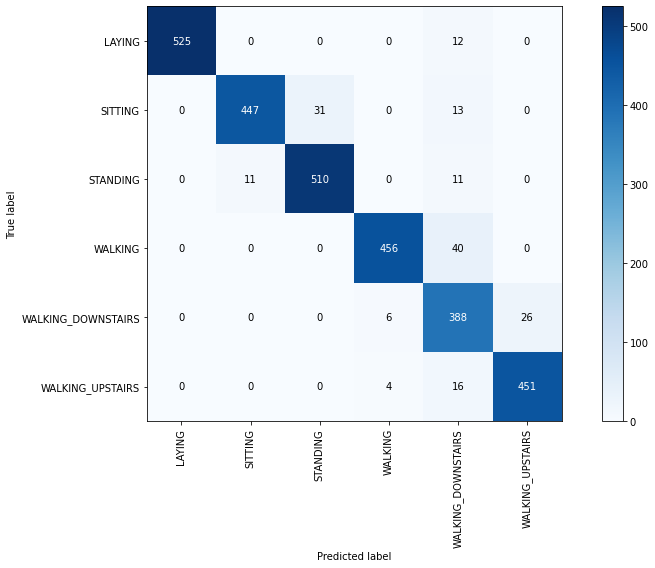

In [24]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred)) # plotting confusion matrix

In [25]:
# getting best random search attributes
get_best_randomsearch_results(kernel_svm_rs)

Best estimator :  SVC(C=8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.125, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Best set of parameters :  {'gamma': 0.125, 'C': 8}
Best score :  0.89689880304679


In [26]:
from sklearn.tree import DecisionTreeClassifier

parameters = {'max_depth':np.arange(2,10,2)}
dt_classifier = DecisionTreeClassifier()
dt_classifier_rs = RandomizedSearchCV(dt_classifier, param_distributions=parameters, cv=5, random_state = 7)
dt_classifier_rs.fit(X_train, y_train)
y_pred = dt_classifier_rs.predict(X_test)

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning:

The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.



In [27]:
dt_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Decision tree : ", dt_accuracy)

Accuracy using Decision tree :  0.8710553104852392


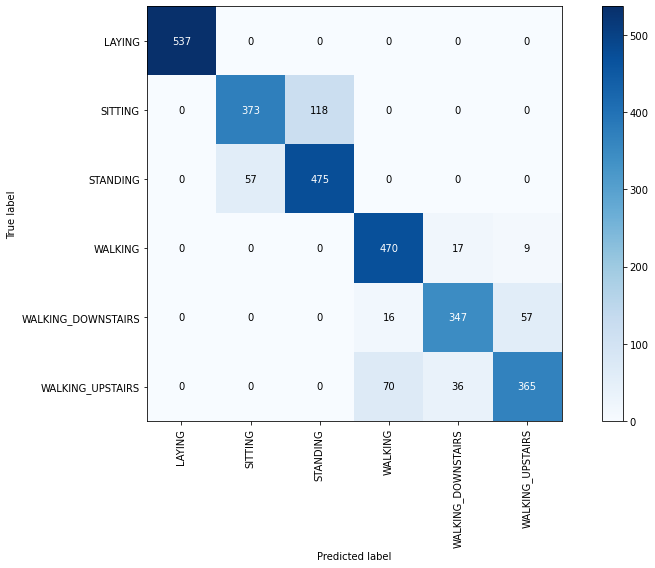

In [28]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred)) # plotting confusion matrix

In [29]:
# getting best random search attributes
get_best_randomsearch_results(dt_classifier_rs)

Best estimator :  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Best set of parameters :  {'max_depth': 8}
Best score :  0.8491566920565833


In [32]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(20,101,10), 'max_depth':np.arange(2,16,2)}
rf_classifier = RandomForestClassifier()
rf_classifier_rs = RandomizedSearchCV(rf_classifier, param_distributions=params,cv=5, random_state = 7)
rf_classifier_rs.fit(X_train, y_train)
y_pred = rf_classifier_rs.predict(X_test)

In [33]:
rf_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Random forest : ", rf_accuracy)

Accuracy using Random forest :  0.9158466236851035


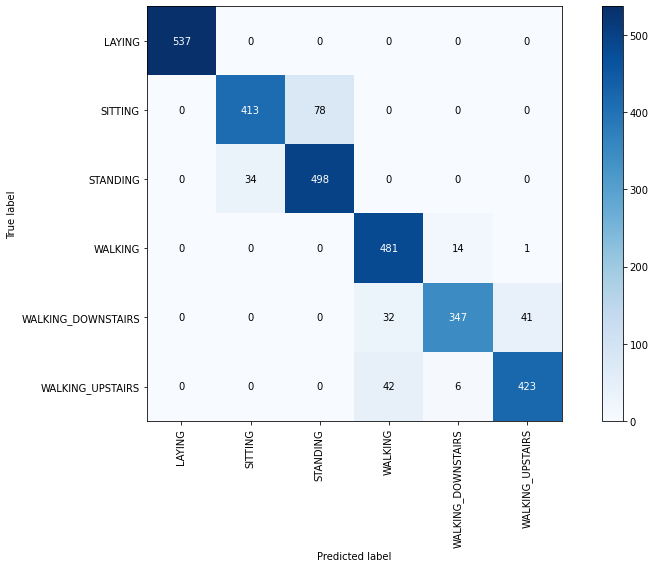

In [34]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred)) # plotting confusion matrix

In [35]:
# getting best random search attributes
get_best_randomsearch_results(rf_classifier_rs)

Best estimator :  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Best set of parameters :  {'n_estimators': 60, 'max_depth': 8}
Best score :  0.9197497279651795


In [ ]:
# 표로 위 모델 적용해서 나온 결과 만들기